In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [2]:

warnings.filterwarnings('ignore')

# Load your data
data = pd.read_csv('reshaped_data.csv')

# Ensure 'Year' is in datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [3]:

# Filter data for a specific country and industry (example: Germany and Electric power industry)
country = 'Germany'
industry = 'Electric power generation, transmission and distribution industry'
subset = data[(data['Country'] == country) & (data['Industry'] == industry)]
subset.set_index('Year', inplace=True)

In [4]:

# Aggregate emissions by year
time_series = subset['emissions'].resample('Y').sum()

In [5]:

# Fit ARIMA model
model = ARIMA(time_series, order=(5, 1, 0))  # Adjust order as needed
model_fit = model.fit()


In [6]:
# Forecast
forecast = model_fit.forecast(steps=10)  # Forecast for the next 10 years


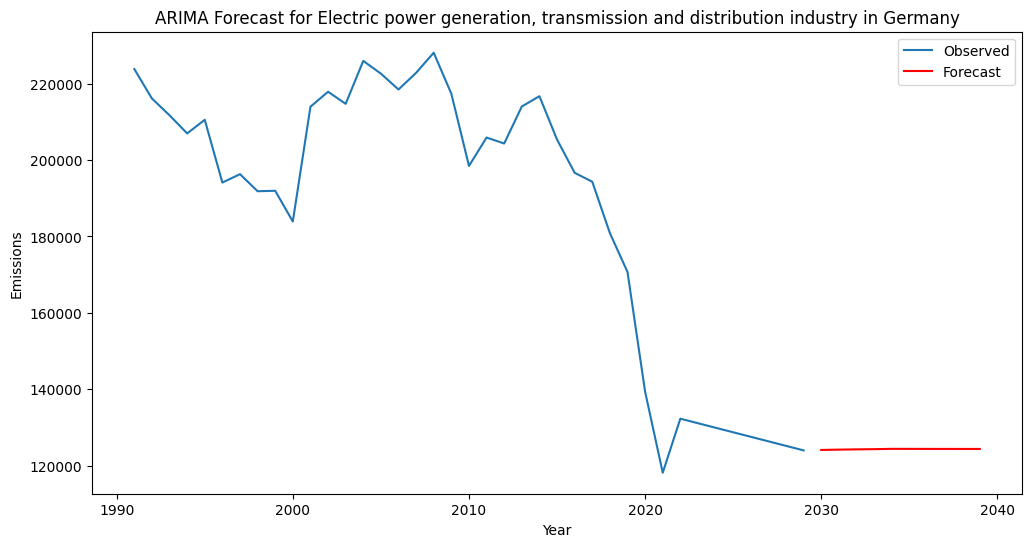

In [7]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast for {industry} in {country}')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()